# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Deep Neural Networks, Classifiers & Features
---

### <a style='color:red'> Due Date: 20.05.2021 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
        * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.
* You should submit two **separated** files:
    * A compressed `.zip` file, with the name: `ee046746_hw2_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside (`.py` or `.ipynb` ONLY!), and all the files required for the code to run (your own images/videos).
            * **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `ee046746_hw2_id1_id2.pdf`.
    * **DON'T** submit the SVHN dataset in your submission, we have a local copy of it.
    * **DON'T** submit the trained networks, but make sure to document every result you get.
        * Be precise, we expect on point answers.
        * No other file-types (`.docx`, `.html`, ...) will be accepted.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.



#### Part 2 - Analyzing a Pre-trained CNN
---
In this part you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. 

You can use the following transform to normalize:

`normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`

<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>

1. Load a pre-trained VGG16 with PyTorch using `torchvision.models.vgg16(pretrained=True, progress=True, **kwargs)` (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (`model.eval()`). 
2. Load the images in the `./birds` folder and display them.
3. Pre-process the images to fit VGG16's architecture. What steps did you take?
4. Feed the images (forward pass) to the model. What are the outputs?
5. Find an image of a bird/cat/dog on the internet, display it and feed it to network. What are the outputs?
6. Apply the following 3 transformations to create 3 *new* images from the image from step 5, and display them (`opencv` has functions for all):
    * One **geometric transformation** (rotation, scaling, translation, warping...).
    * One **color transformation** (thresholding, different color space, hue, saturation, brightness, contrast...).
    * One **filter** (any filter you want).
7. Feed the transformed images to network, what is the output? is it different than section 5?
8. For the first 3 filters in the *first layer* of VGG16, plot the filters, and then plot their response (their output) for the image from section 5 and the 3 images from section 6 (total of 4 input images). Explain what do you see.
    * Consult `ee046746_appndx_visualizing_cnn_filters.ipynb` to refresh your memory.
9. For each image in the `./dogs` and `./cats` folders, extract and save their feature vectors (create a numpy array or a torch tensor that contains the features for all samples) from a fully-connected layer (such as `FC7`) of the VGG16 model. Which layer did you pick? What is the size of the feature space?
    * You need to write a function that does the feed forward manually until the desired layer. See the example in `ee046746_appndx_visualizing_cnn_filters.ipynb`. 
10. Build a Support Vector Machine (SVM) classifier (hint: `sklearn.svm.LinearSVC`) to classify cats and dogs based on the features you extracted. Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets. You can choose a different classifer than SVM from the `scikit-learn` library, no need to explain how it works (but report the name of the algorithm you used). What are the results?

## <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Answers - Q2


In [1]:
#imports for our work

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import torch
import torch.nn as nn
import torchvision

# import datasets in torchvision
import torchvision.datasets as datasets

# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils

from os import listdir
from os.path import isfile, join
import scipy.io

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#!mkdir -p ../data/my_data/
#!cp -r drive/MyDrive/data/* ../data/
#!ls ../data/
#!cp -r drive/MyDrive/my_data/* ../data/my_data/
#!mkdir ../output/
#!mkdir -p ../code/part_2/
#!cd ../code/part_2/

In [3]:
# %% Global parameters and functions

root_path = '../../'
data_path = root_path + 'data/'
birds_path = data_path + 'birds/'
dogs_path = data_path + 'dogs/'
cats_path = data_path + 'cats/'
my_data_path = data_path + 'my_data/'
svm_test_data_path = my_data_path + 'svm_test/' 
output_path = root_path + "output/"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

vgg16_minimum_image_size_in_pixels = (224,224)
vgg16_mean = [0.485, 0.456, 0.406]
vgg16_std = [0.229, 0.224, 0.225]

dog_label = 0
cat_label = 1

def convert_from_cv2_img_to_pil_img(img: np.ndarray) -> Image:
  return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def convert_from_pil_img_to_cv2_img(img: Image) -> np.ndarray:
  return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


### Q2 - section 1

In [4]:
# %% 2.1


model = models.vgg16(pretrained=True, progress=True).to(device)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### Q2 - section 2

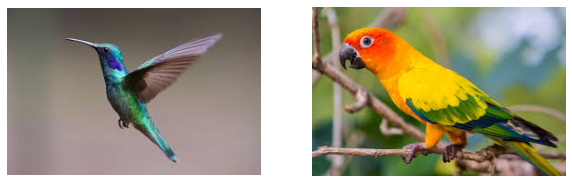

In [5]:
# 2.2
birds_files = [join(birds_path, f) for f in listdir(birds_path) if isfile(join(birds_path, f))]

fig = plt.figure(figsize=(10,15))
birds_images = []
for i,file in enumerate(birds_files):
  image_bgr = cv2.imread(file)
  birds_images.append(image_bgr)
  ax = fig.add_subplot(1, len(birds_files),i+1)
  ax.imshow(cv2.cvtColor(birds_images[i], cv2.COLOR_BGR2RGB))
  ax.set_axis_off()


### Q2 - section 3

We have resized the images to the needed size for the CNN. We normailized the images according to the mean and std of the dataset the network was trained on.

In [6]:
# 2.3
normalize = transforms.Normalize(mean=vgg16_mean, std=vgg16_std)
preprocess = transforms.Compose([
  transforms.Resize(vgg16_minimum_image_size_in_pixels),
  transforms.ToTensor(),
  normalize
  ])

preprocessed_birds_images = []
for bird_image in birds_images:
  pil_image=convert_from_cv2_img_to_pil_img(bird_image)
  preprocessed_birds_images.append(preprocess(pil_image).unsqueeze(0).to(device)) 



### Q2 - section 4
VGG16 was trained on ImageNet (ILSVRC) data. according to classes names mapping from the index:   (https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)  
It seems that the VGG16 model classified the bird images correctly:  
 ...  
 <b>90: 'lorikeet',</b>  
 91: 'coucal',  
 92: 'bee eater',  
 93: 'hornbill',  
 <b>94: 'hummingbird',</b>  
 ...  
 ...

In [7]:
# 2.4
for preprocessed_bird_image in preprocessed_birds_images:
  _, index = model(preprocessed_bird_image).data[0].max(0)
  print(f"predicted class: {index}")

predicted class: 94
predicted class: 90


### Q2 - section 5

The label selected(mapped from the index) is 'tiger cat' (282 in classes indexes).  
 ...  
 281: 'tabby, tabby cat',  
 <b>282: 'tiger cat',</b>  
 283: 'Persian cat',  
 ...

predicted class: 282


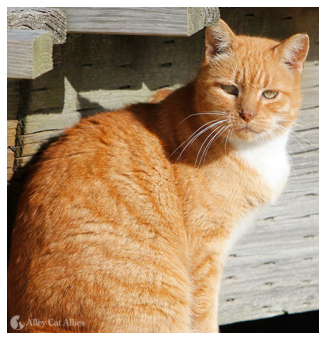

In [8]:
# 2.5
cat_from_web = Image.open(join(my_data_path, 'BoardwalkCats_344.jpg'))
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(cat_from_web)
ax.set_axis_off()

preprocessed_cat_from_web = preprocess(cat_from_web).unsqueeze(0).to(device)
_, index = model(preprocessed_cat_from_web).data[0].max(0)
print(f"predicted class: {index}")

### Q2 - section 6


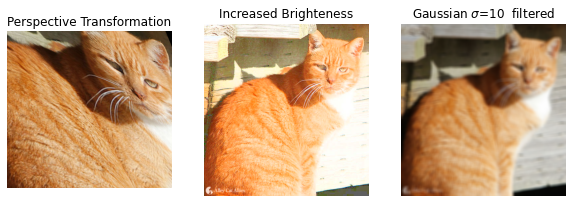

In [9]:
# 2.6

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

cat_from_web_cv2 = cv2.cvtColor(np.array(cat_from_web), cv2.COLOR_RGB2BGR)

rows,cols,ch = cat_from_web_cv2.shape

stretch_diagonal = 150
pts1 = np.float32([[stretch_diagonal,stretch_diagonal],[rows-10,10],[10,cols-10],[rows-stretch_diagonal,cols-stretch_diagonal]])
pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

M = cv2.getPerspectiveTransform(pts1,pts2)
warpped_cat = cv2.warpPerspective(cat_from_web_cv2, M, (rows,cols))
brighted_cat = increase_brightness(cat_from_web_cv2, value=90)
gblur_filtered_cat = cv2.GaussianBlur(cat_from_web_cv2,(11,11), sigmaX=10)

fig = plt.figure(figsize=(10,25))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(cv2.cvtColor(warpped_cat, cv2.COLOR_BGR2RGB))
ax.set_axis_off()
ax.set_title('Perspective Transformation')
ax = fig.add_subplot(1, 3, 2)
ax.imshow(cv2.cvtColor(brighted_cat, cv2.COLOR_BGR2RGB))
ax.set_axis_off()
ax.set_title('Increased Brighteness')
ax = fig.add_subplot(1, 3, 3)
ax.imshow(cv2.cvtColor(gblur_filtered_cat, cv2.COLOR_BGR2RGB))
ax.set_title(f'Gaussian $\sigma$=10  filtered')
ax.set_axis_off()



### Q2 - section 7
After some perspective transformation wrapping, adding some brightness or gaussian blurring, the model still predicts the cat correctly.

In [10]:
# 2.7

preprocessed_warpped_cat = preprocess(convert_from_cv2_img_to_pil_img(warpped_cat)).unsqueeze(0).to(device)
_, index = model(preprocessed_warpped_cat).data[0].max(0)
print(f"wrapped cat predicted class: {index}")
preprocessed_brighted_cat = preprocess(convert_from_cv2_img_to_pil_img(brighted_cat)).unsqueeze(0).to(device)
_, index = model(preprocessed_brighted_cat).data[0].max(0)
print(f"brighted cat predicted class: {index}")
preprocessed_gblur_filtered_cat = preprocess(convert_from_cv2_img_to_pil_img(gblur_filtered_cat)).unsqueeze(0).to(device)
_, index = model(preprocessed_gblur_filtered_cat).data[0].max(0)
print(f"gaussian blurred cat predicted class: {index}")


wrapped cat predicted class: 282
brighted cat predicted class: 282
gaussian blurred cat predicted class: 282


### Q2 - section 8

we can see that the first filter (0 index) response is high on fur and probably high frequency areas in the image (high pass filter).  
The other filters seems to do some edge detection based on hue or grey.

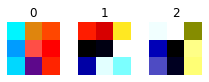

In [11]:
# 2.8

def plot_filters_multi_channel(t, num_of_kernels_to_plot=None):
  # get the number of kernals
  num_kernels = t.shape[0]
  if num_of_kernels_to_plot != None:
    num_kernels = num_of_kernels_to_plot
  # define number of columns for subplots
  num_cols = 12
  # rows = num of kernels
  num_rows = num_kernels
  # set the figure size
  fig = plt.figure(figsize=(num_cols,num_rows))
  # looping through all the kernels
  for i in range(num_kernels):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    # for each kernel, we convert the tensor to numpy
    npimg = np.array(t[i].cpu().numpy(), np.float32)
    # standardize the numpy image
    npimg = (npimg - np.mean(npimg)) / np.std(npimg)
    npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
    npimg = npimg.transpose((1, 2, 0))
    ax1.imshow(npimg)
    ax1.axis('off')
    ax1.set_title(str(i))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
  # plt.savefig('myimage.png', dpi=100)
  plt.tight_layout()

def plot_weights(model, layer_num, num_of_filters_to_plot=None):
  # extracting the model features at the particular layer number
  layer = model.features[layer_num]
  # checking whether the layer is convolution layer or not
  if isinstance(layer, nn.Conv2d):
    # getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    if weight_tensor.shape[1] == 3:
      num_of_kernels_to_plot = None
      if num_of_filters_to_plot != None:
        num_of_kernels_to_plot = num_of_filters_to_plot
      plot_filters_multi_channel(weight_tensor, num_of_kernels_to_plot=num_of_kernels_to_plot)
    else:
      print("Can only plot weights with three channels with single channel = False")
  else:
    print("Can only visualize layers which are convolutional")

plot_weights(model, 0, num_of_filters_to_plot=3)

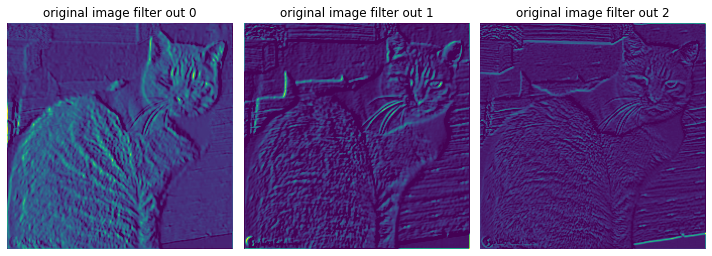

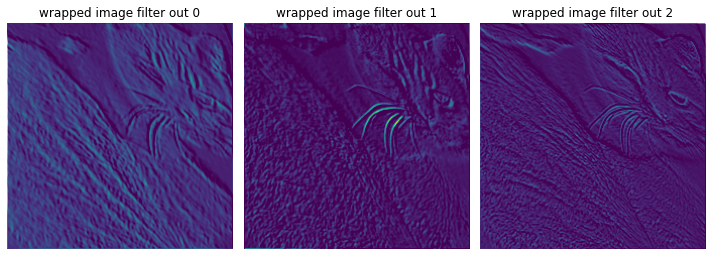

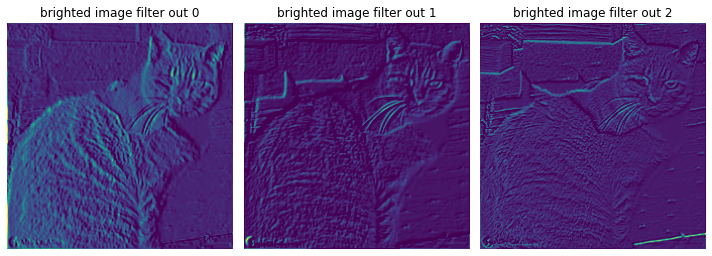

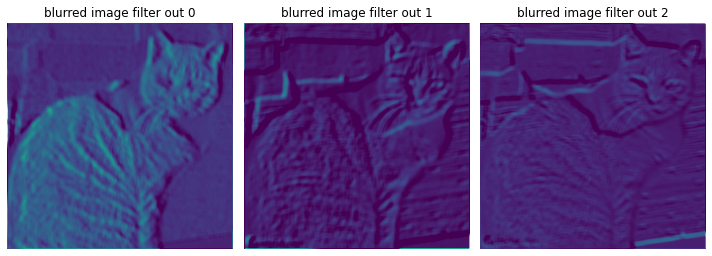

In [12]:
def filter_outputs(image, model, layer_to_visualize, num_of_channels_to_plot=None, image_label=None):
  modulelist = list(model.features.modules())
  if layer_to_visualize < 0:
    layer_to_visualize += 31
  output = None
  name = None
  for count, layer in enumerate(modulelist[1:]):
    image = layer(image)
    if count == layer_to_visualize:
      output = image
      name = str(layer)

  filters = []
  output = output.data.squeeze().cpu().numpy()
  channels_to_plot = output.shape[0]
  if num_of_channels_to_plot != None:
    channels_to_plot = num_of_channels_to_plot
  for i in range(channels_to_plot):
    filters.append(output[i,:,:])

  #print(f"{image_label}")
  fig = plt.figure(figsize=(10, 10))
  for i in range(channels_to_plot):
    ax = fig.add_subplot(1, channels_to_plot, i+1)
    imgplot = ax.imshow(filters[i])
    ax.set_title(f"{image_label} filter out {i}")
    ax.set_axis_off()
  plt.tight_layout()
    
filter_outputs(preprocessed_cat_from_web, model, 0, num_of_channels_to_plot=3, image_label="original image")
filter_outputs(preprocessed_warpped_cat, model, 0, num_of_channels_to_plot=3, image_label="wrapped image")
filter_outputs(preprocessed_brighted_cat, model, 0, num_of_channels_to_plot=3, image_label="brighted image")
filter_outputs(preprocessed_gblur_filtered_cat, model, 0, num_of_channels_to_plot=3, image_label="blurred image")


### Q2 - section 9

We've selected the last FC layer with 4096 nuerons just before the linear layer that maps it to the last classes layer (1000 classes).  
(classifier): Sequential(  
&nbsp;&nbsp;&nbsp;&nbsp;(0): Linear(in_features=25088, out_features=4096, bias=True)  
&nbsp;&nbsp;&nbsp;&nbsp;(1): ReLU(inplace=True)  
&nbsp;&nbsp;&nbsp;&nbsp;(2): Dropout(p=0.5, inplace=False)  
&nbsp;&nbsp;&nbsp;&nbsp;(3): Linear(in_features=4096, out_features=4096, bias=True)  
&nbsp;&nbsp;&nbsp;&nbsp;<b>(4): ReLU(inplace=True)</br>  


In [13]:
def read_and_preprocess(filename):
  image_bgr = cv2.imread(filename)
  return preprocess(convert_from_cv2_img_to_pil_img(image_bgr)).to(device)

def forward_batch_upto_last_fc_layer(batch, classifier_wanted_fc_layer):
  # forward in model up to classifier FC layers
  cnn_out = model.features(batch)
  avg_out = model.avgpool(cnn_out)
  #print(f"avg_out.size() {avg_out.size()}")
  flatten_out = avg_out.flatten(start_dim=1) 
  #print(f"flatten_out.size() {flatten_out.size()}")
  return model.classifier[:classifier_wanted_fc_layer](flatten_out).detach().cpu().numpy()

dogs_files = [join(dogs_path, f) for f in listdir(dogs_path) if isfile(join(dogs_path, f))]
cats_files = [join(cats_path, f) for f in listdir(cats_path) if isfile(join(cats_path, f))]

dogs_and_cats_images = []
labels = []
for file in dogs_files:
  prep_image = read_and_preprocess(file)
  dogs_and_cats_images.append(prep_image)
  labels.append(dog_label)

for file in cats_files:
  prep_image = read_and_preprocess(file)
  dogs_and_cats_images.append(prep_image)
  labels.append(cat_label)

# create batch of images for model forward
images_batch = torch.stack(dogs_and_cats_images, dim=0)
#print(f"images_batch.size() {images_batch.size()}")

# forward in model up to classifier FC layers
images_z_vectors = forward_batch_upto_last_fc_layer(images_batch, classifier_wanted_fc_layer=5)
#print(f"images_z_vectors.shape {images_z_vectors.shape}")

scipy.io.savemat(output_path + 'images_z_vectors', {'images_z_vectors':images_z_vectors})


### Q2 - section 10

The SVM classifies the images correctly based on thier representation as a 4096 feature vector.  
This is not suprising (even though we have a small training dataset for the SVM), as we have 2 different classes and probably the feature vector input encapsulates the main differences between the classes and the SVM manages to classify easily.  
We should emphasize that the feature vector was trained with VGG model over a huge training dataset to get such a good and unique representation for each class.

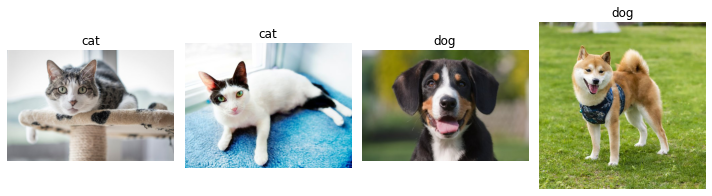

In [14]:
from sklearn import svm

svm_model = svm.LinearSVC()
svm_model.fit(images_z_vectors, labels)

svm_test_files = [join(svm_test_data_path, f) for f in listdir(svm_test_data_path) if isfile(join(svm_test_data_path, f))]

test_images = []
test_prep_images = []
for file in svm_test_files:
  image = Image.open(file)
  test_images.append(image)
  prep_image = preprocess(image).to(device)
  test_prep_images.append(prep_image)

# create batch of images for model forward
test_batch = torch.stack(test_prep_images, dim=0)

# forward in model up to classifier FC layers
test_images_z_vectors = forward_batch_upto_last_fc_layer(test_batch, classifier_wanted_fc_layer=5)

predictions = svm_model.predict(test_images_z_vectors)

fig = plt.figure(figsize=(10,15))
for i, test_image in enumerate(test_images):
  ax = fig.add_subplot(1, len(test_images),i+1)
  ax.imshow(test_image)
  ax.set_axis_off()
  if predictions[i] == cat_label:
    label = "cat"
  else:
    label = "dog"
  ax.set_title(f"{label}")
plt.tight_layout()


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com